In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [2]:
!git clone https://github.com/anvarnarz/praktikum_datasets.git

Cloning into 'praktikum_datasets'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 145 (delta 46), reused 44 (delta 43), pack-reused 93
Receiving objects: 100% (145/145), 9.72 MiB | 11.76 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [3]:
df = pd.read_csv("/content/praktikum_datasets/E-Commerce-Dataset.csv", index_col=0)
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [20]:
df.shape

(5630, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain     

In [6]:
df.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.fillna(method='ffill', inplace=True)

In [8]:
df.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [10]:
Churn_rate=df['Churn'].value_counts()/len(df)*100
Churn_rate

0    83.161634
1    16.838366
Name: Churn, dtype: float64

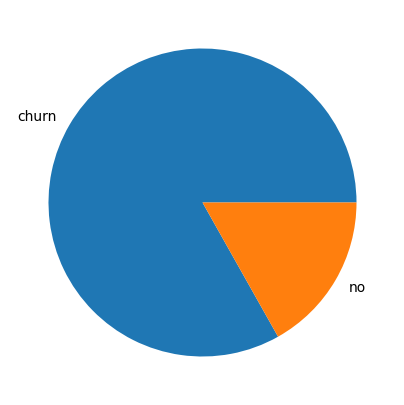

In [11]:
plt.figure(figsize=(5,5))
plt.pie(Churn_rate, labels=['churn','no'])
plt.show()

#Raqamli ustunlar tahlili

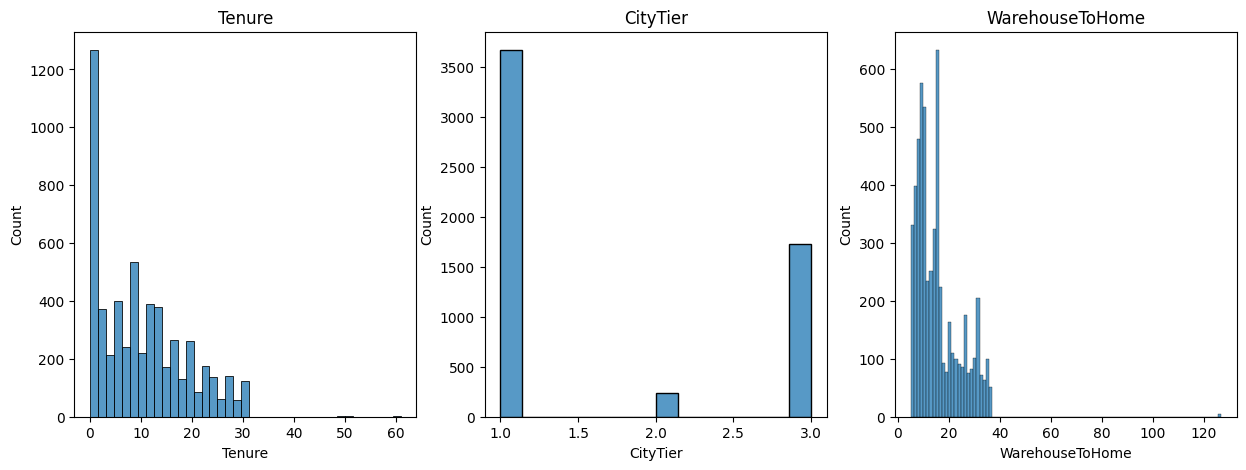

In [19]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Tenure")

#OrderCount
sns.histplot(x="CityTier", data=df, ax=axes[1])
axes[1].set_title("CityTier")

# Cashback
sns.histplot(x="WarehouseToHome", data=df, ax=axes[2])
axes[2].set_title("WarehouseToHome")

plt.show()

#kategoriyali ustunlar tahlili

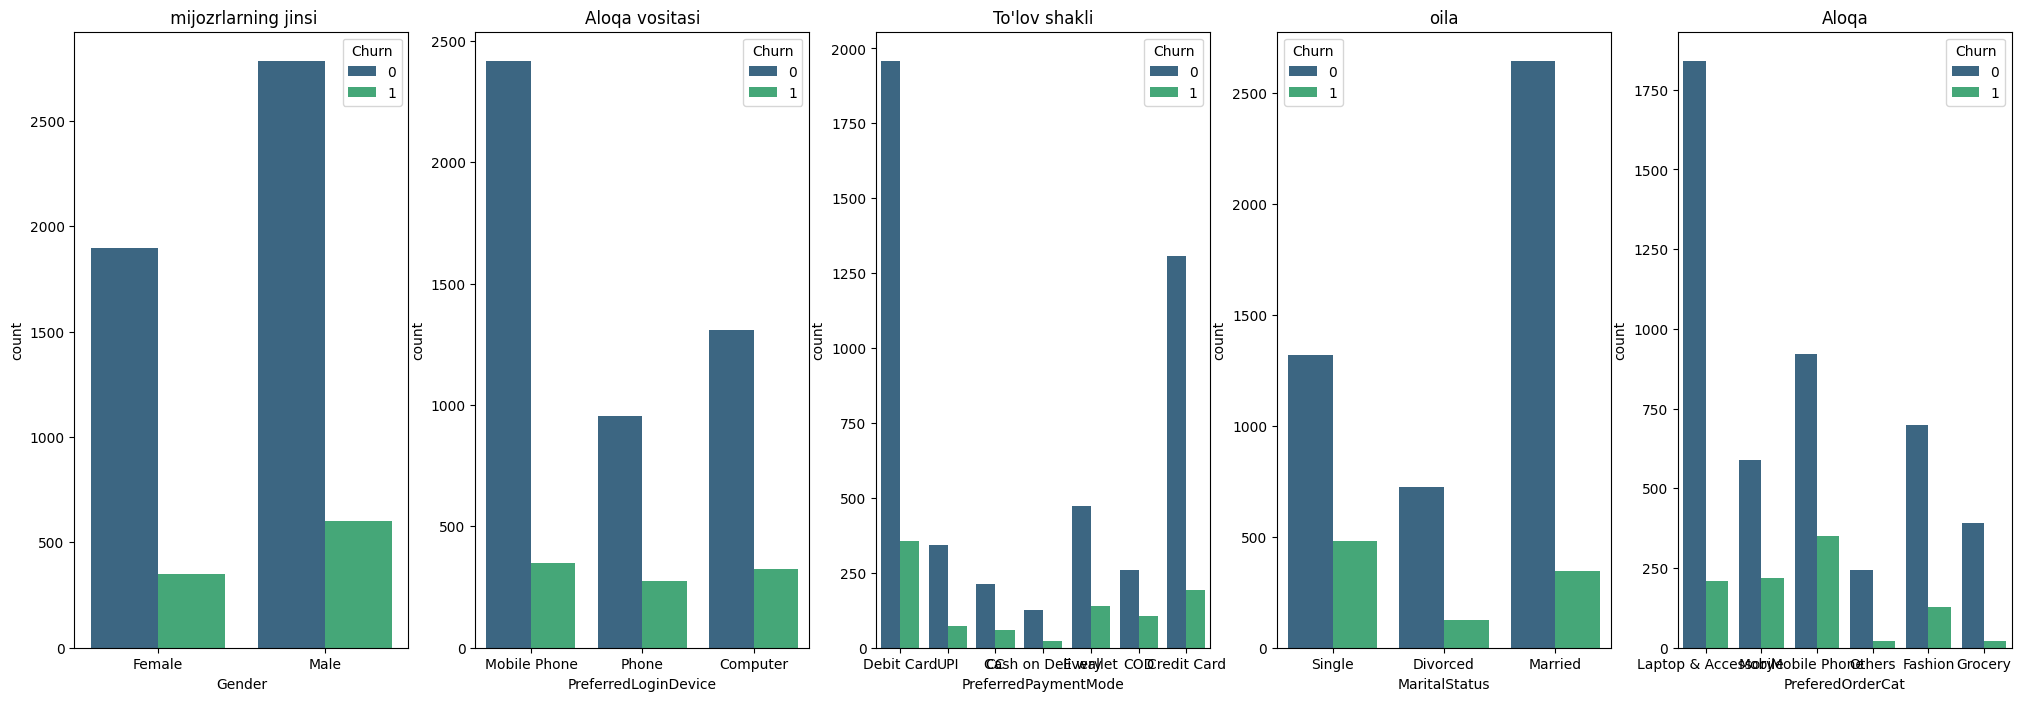

In [16]:
fig, axes = plt.subplots(1,5, figsize=(25,8))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title(" mijozrlarning jinsi")

sns.countplot(x='PreferredLoginDevice', hue='Churn', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Aloqa vositasi")

sns.countplot(x='PreferredPaymentMode', hue='Churn', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("To'lov shakli")

sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=df, ax=axes[3])
axes[3].set_title("oila")

sns.countplot(x='PreferedOrderCat', hue='Churn', palette='viridis', data=df, ax=axes[4])
axes[4].set_title("Aloqa")

plt.show()

#Korrelyatsiya

In [18]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)


<ipython-input-18-b361e99cad45>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.329355
Complain                       0.250188
DaySinceLastOrder              0.154776
CashbackAmount                 0.154161
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.066839
NumberOfAddress                0.043931
OrderCount                     0.029072
HourSpendOnApp                 0.015009
CouponUsed                     0.003854
OrderAmountHikeFromlastYear    0.003334
dtype: float64

In [21]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

<ipython-input-21-f0053e680f59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,0.329355,0.084703,0.066839,0.015009,0.107939,0.105481,0.043931,0.250188,0.003334,0.003854,0.029072,0.154776,0.154161
Tenure,0.329355,1.000000,0.055706,0.009934,0.003259,0.023632,0.012449,0.225998,0.015203,0.014754,0.107202,0.166222,0.176068,0.452415
CityTier,0.084703,0.055706,1.000000,0.016419,0.001424,0.027934,0.011554,0.029440,0.003375,0.024515,0.020851,0.028091,0.021486,0.055698
WarehouseToHome,0.066839,0.009934,0.016419,1.000000,0.055046,0.016568,0.004339,0.010410,0.040507,0.013847,0.000701,0.008000,0.012015,0.010049
HourSpendOnApp,0.015009,0.003259,0.001424,0.055046,1.000000,0.320594,0.030427,0.156321,0.010554,0.105045,0.195017,0.116949,0.087640,0.149997
NumberOfDeviceRegistered,0.107939,0.023632,0.027934,0.016568,0.320594,1.000000,0.017228,0.084997,0.003407,0.070943,0.155645,0.102859,0.025867,0.137396
SatisfactionScore,0.105481,0.012449,0.011554,0.004339,0.030427,0.017228,1.000000,0.053583,0.031115,0.024778,0.016777,0.022880,0.030881,0.003429
NumberOfAddress,0.043931,0.225998,0.029440,0.010410,0.156321,0.084997,0.053583,1.000000,0.026399,0.015189,0.039161,0.012217,0.061144,0.186802
Complain,0.250188,0.015203,0.003375,0.040507,0.010554,0.003407,0.031115,0.026399,1.000000,0.004489,0.000161,0.015342,0.044611,0.000598
OrderAmountHikeFromlastYear,0.003334,0.014754,0.024515,0.013847,0.105045,0.070943,0.024778,0.015189,0.004489,1.000000,0.039407,0.038046,0.013550,0.031551


#ML ga tayyorgarlik

In [22]:
# Matnli ustunlarni songa o'tkazamiz
data = pd.get_dummies(df)
data.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,0,0,0,1,0,0,0,0,0,1
50002,1,4.0,1,8.0,3.0,4,3,7,1,15.0,...,1,0,0,0,1,0,0,0,0,1
50003,1,4.0,1,30.0,2.0,4,3,6,1,14.0,...,1,0,0,0,1,0,0,0,0,1
50004,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,1,0,0,1,0,0,0,0,0,1
50005,1,0.0,1,12.0,2.0,3,5,3,0,11.0,...,1,0,0,0,1,0,0,0,0,1


In [23]:
X = data.drop("Churn", axis=1)
y = data['Churn']

In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#Model training

#Logistik regression

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       936
           1       0.77      0.55      0.64       190

    accuracy                           0.90      1126
   macro avg       0.84      0.76      0.79      1126
weighted avg       0.89      0.90      0.89      1126

Model aniqligi: 0.8960923623445826


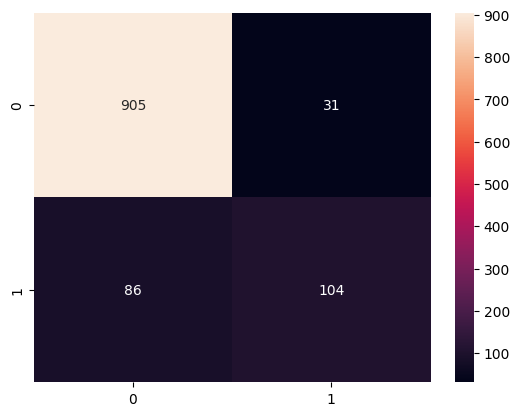

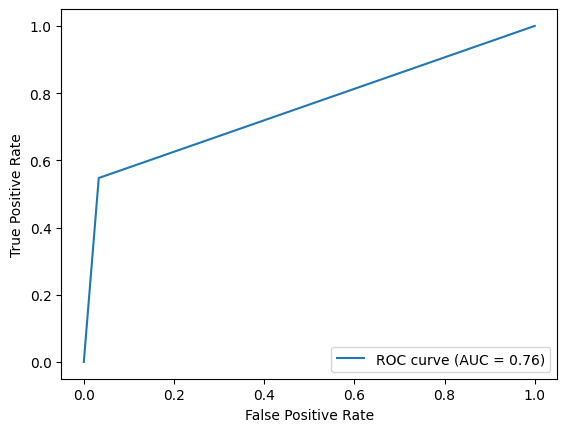

In [26]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = LR_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#Support Vector Machines

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       936
           1       0.88      0.59      0.70       190

    accuracy                           0.92      1126
   macro avg       0.90      0.79      0.83      1126
weighted avg       0.91      0.92      0.91      1126

Model aniqligi: 0.91651865008881


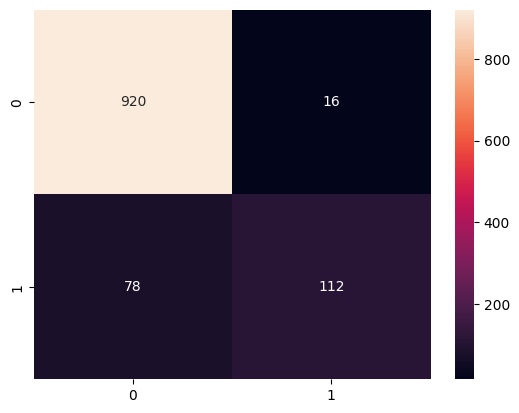

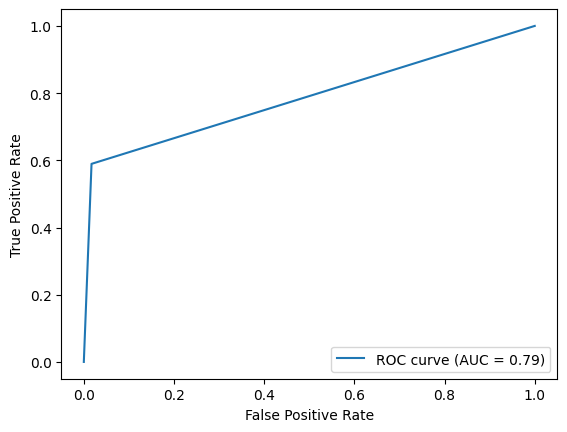

In [27]:
# Modelni yaratamiz (training)
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#Destigion tree

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       936
           1       0.83      0.88      0.85       190

    accuracy                           0.95      1126
   macro avg       0.90      0.92      0.91      1126
weighted avg       0.95      0.95      0.95      1126

Model aniqligi: 0.9493783303730018


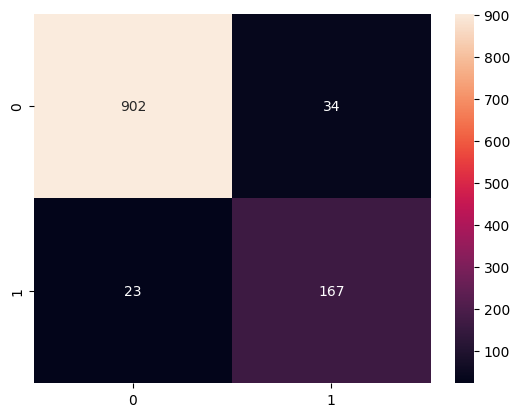

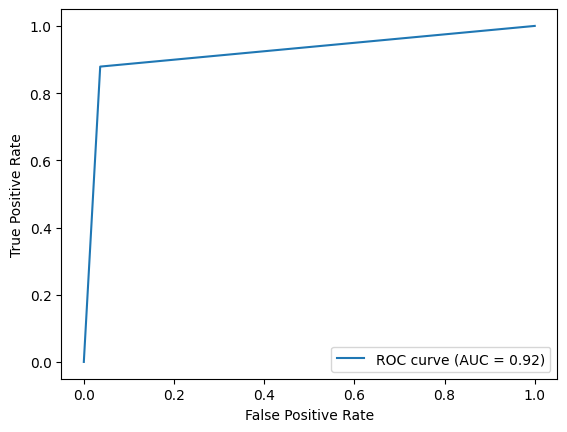

In [28]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

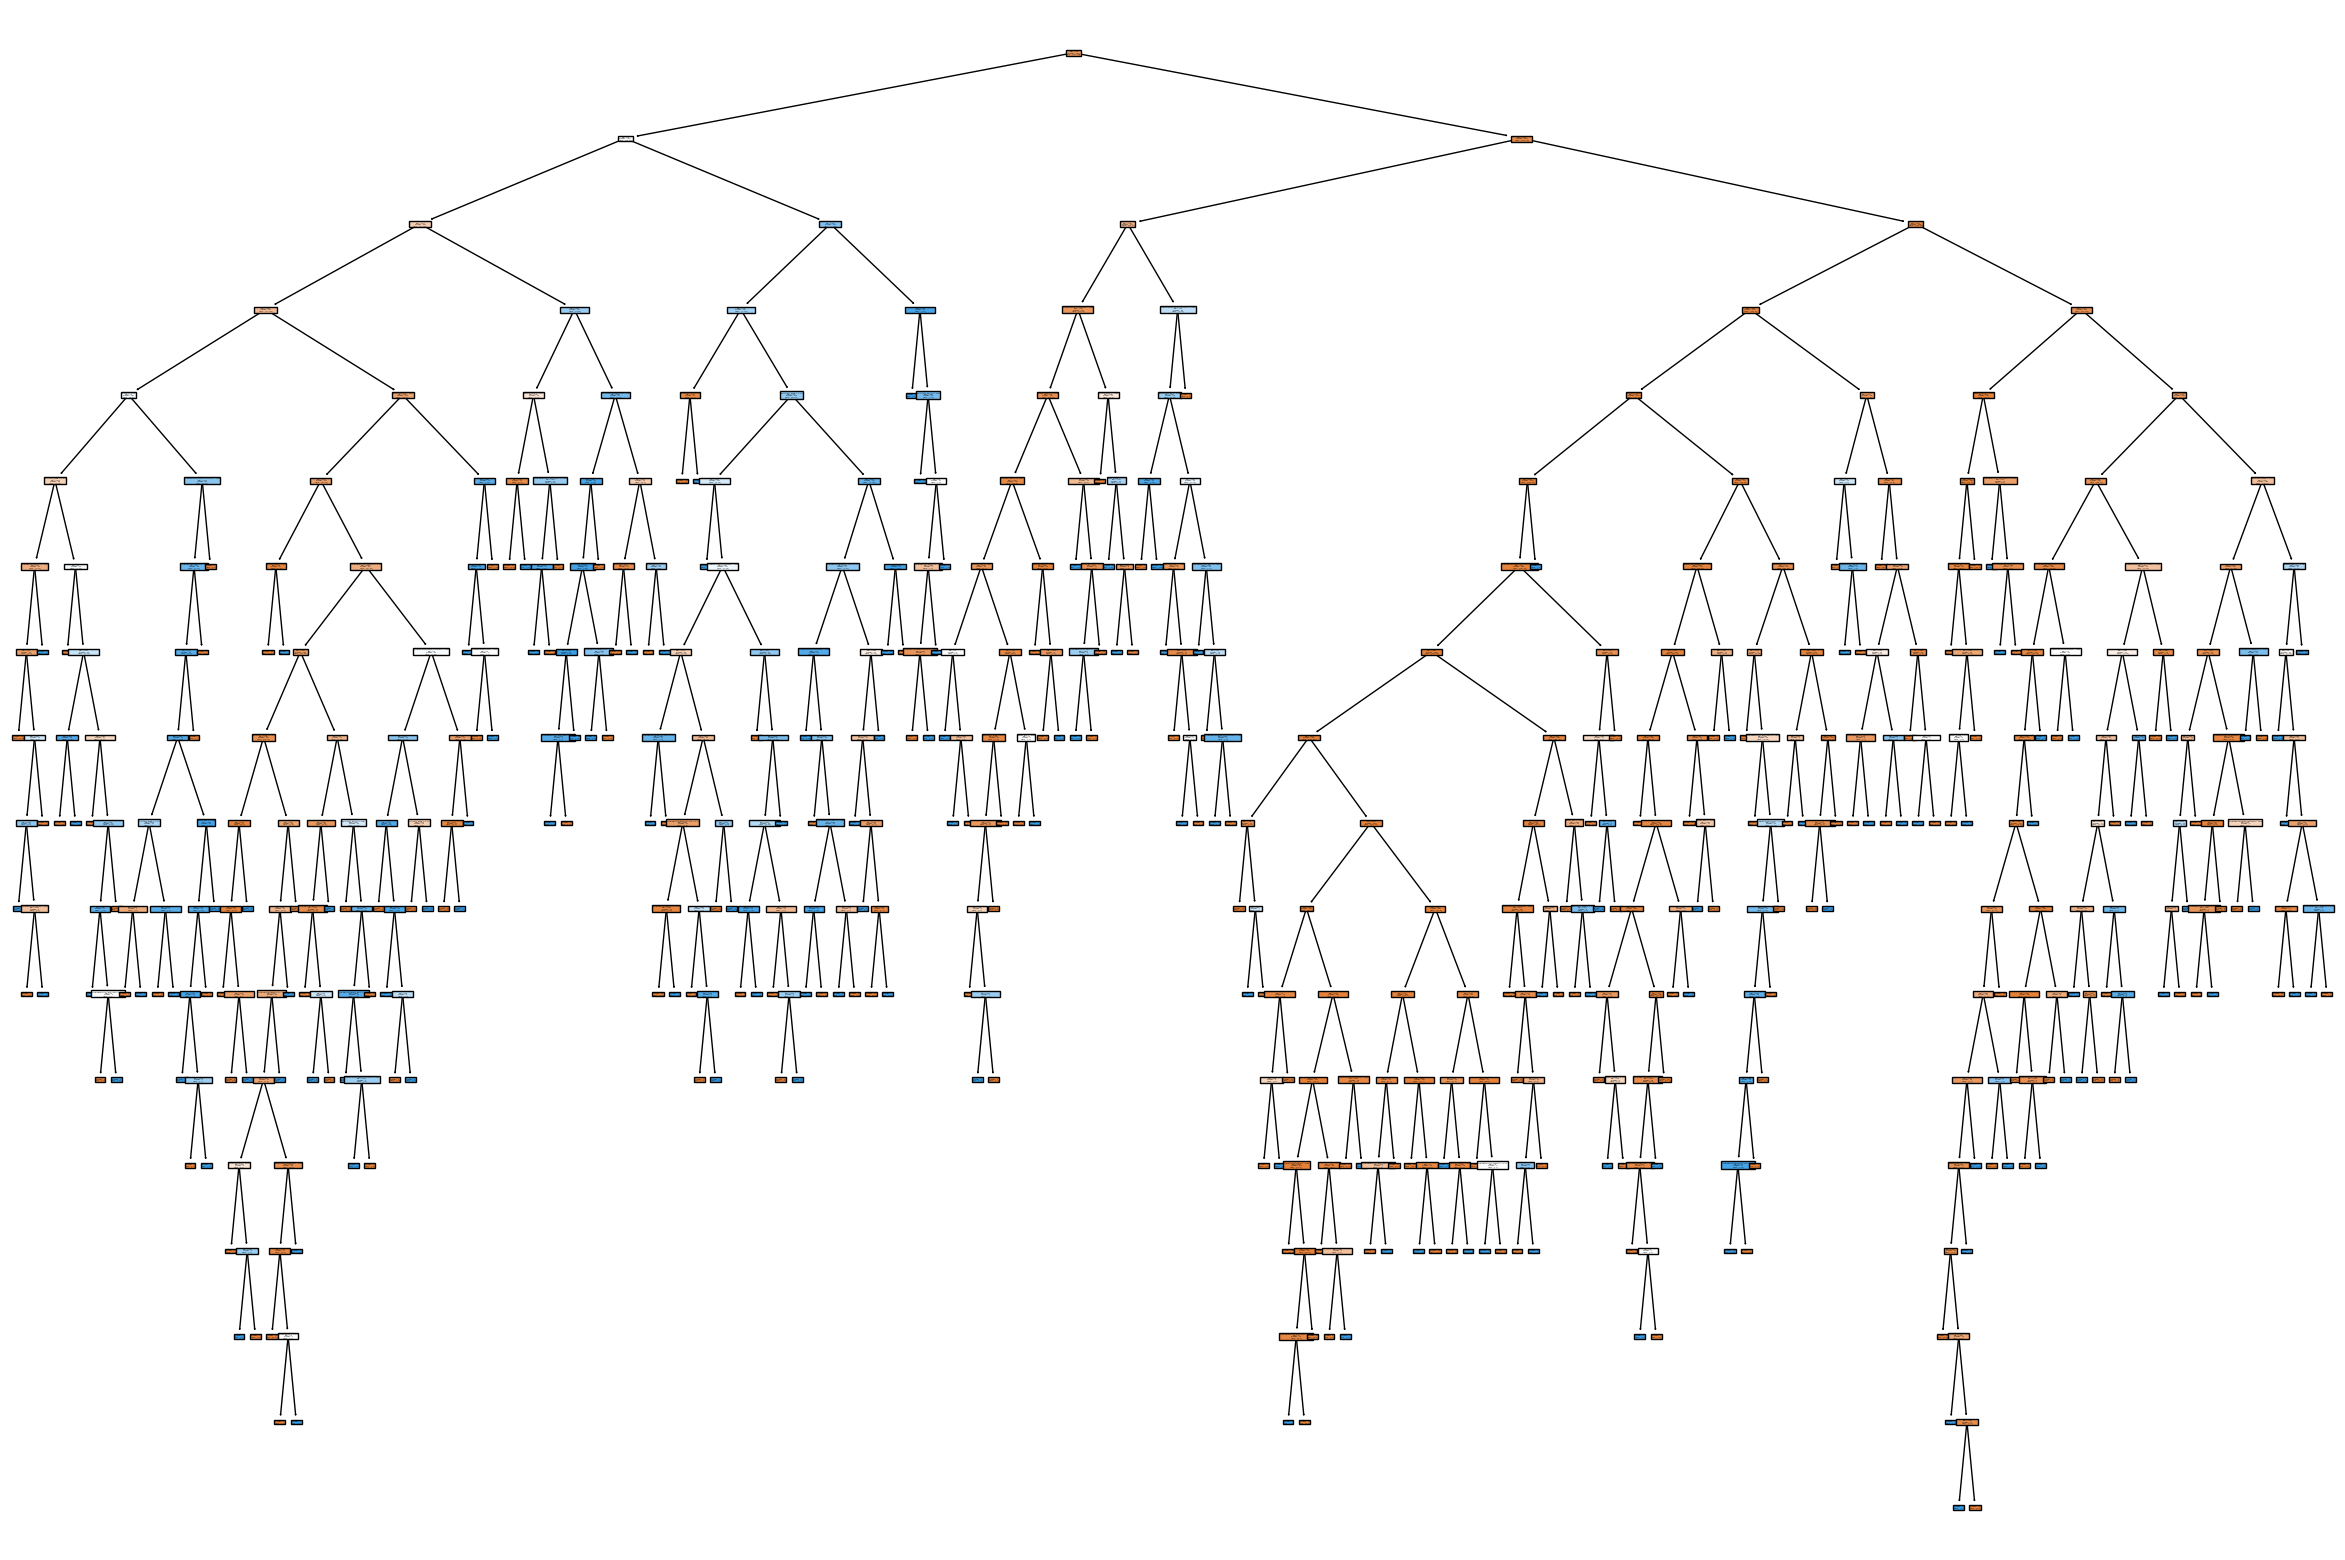

In [29]:
cols = data.drop('Churn', axis=1).columns

plt.figure(figsize=(30,20))
plot_tree(tree_model, feature_names=cols, filled=True)
plt.show()

#Cross validation

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       936
           1       0.83      0.88      0.85       190

    accuracy                           0.95      1126
   macro avg       0.90      0.92      0.91      1126
weighted avg       0.95      0.95      0.95      1126

Model aniqligi: 0.9493783303730018


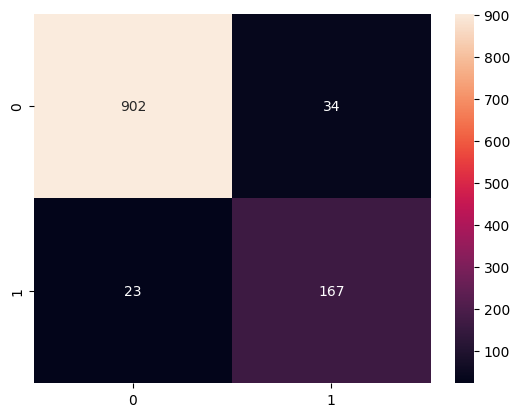

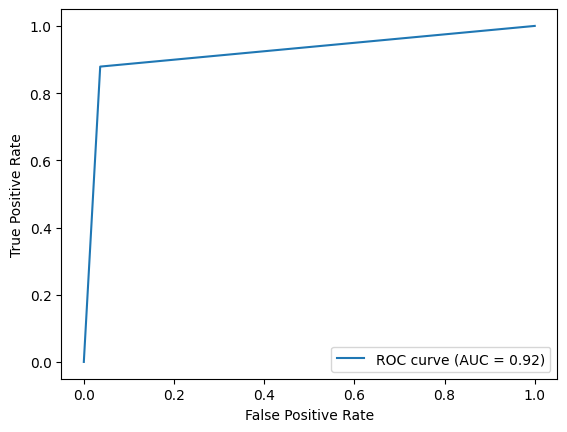

In [30]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#Random Forest Classifier

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       936
           1       0.95      0.84      0.89       190

    accuracy                           0.97      1126
   macro avg       0.96      0.92      0.94      1126
weighted avg       0.97      0.97      0.97      1126

Model aniqligi: 0.9662522202486679


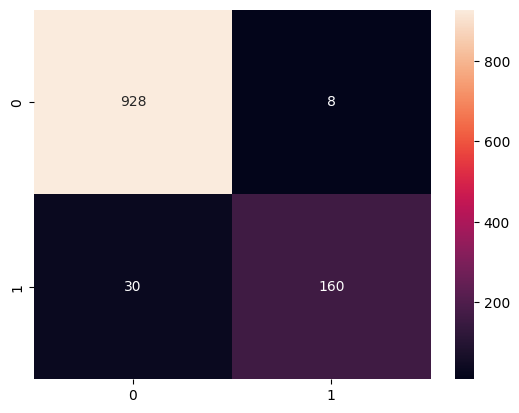

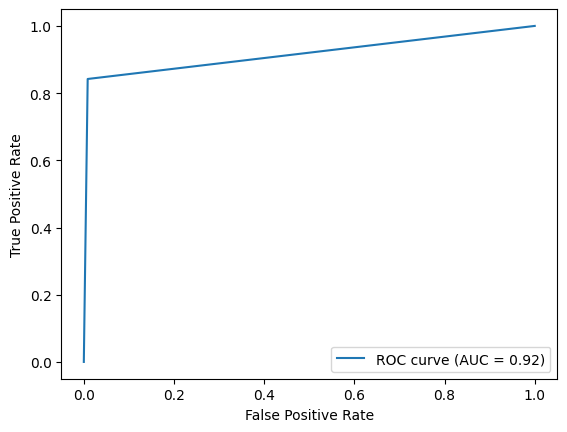

In [31]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#XGBClassifier

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.93      0.94      0.93       190

    accuracy                           0.98      1126
   macro avg       0.96      0.96      0.96      1126
weighted avg       0.98      0.98      0.98      1126

Model aniqligi: 0.9769094138543517


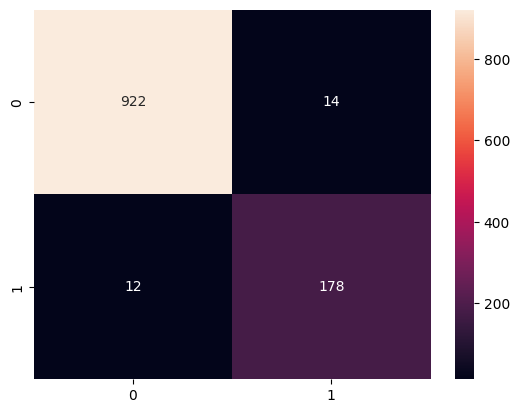

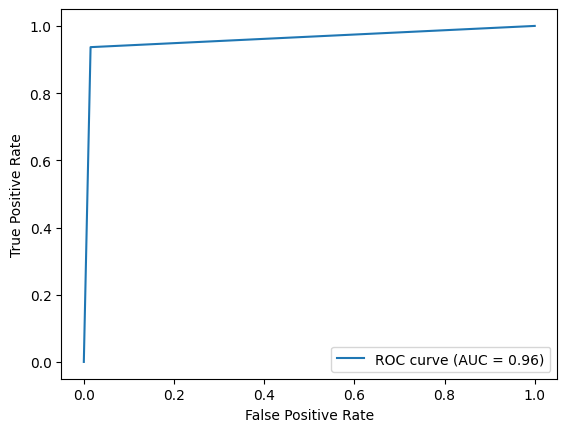

In [32]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#GradientBoostingClassifier



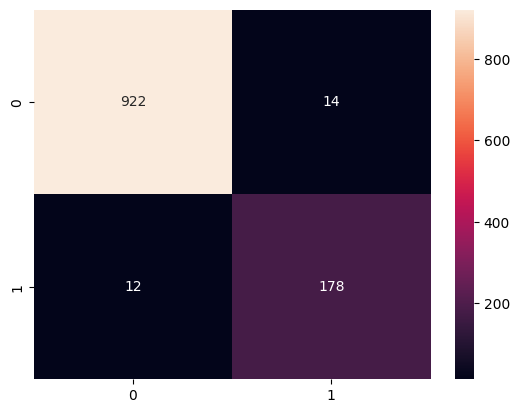

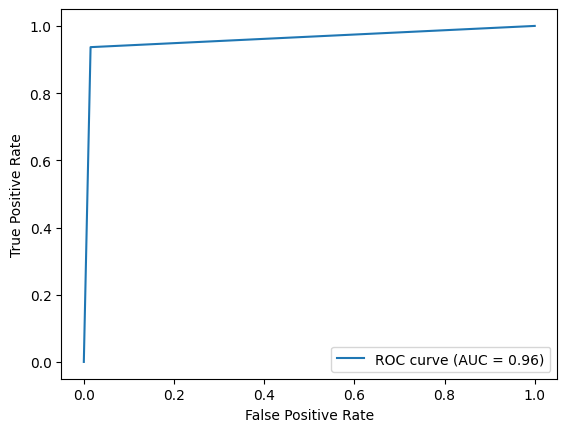

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

model_gmb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

cross_gmb = cross_val_predict(model_gmb, X_train, y_train, cv = 5)

# Modelni baholaymiz
# y_pred = cross_gmb.predict(X_test)
# print(metrics.classification_report(y_test, y_pred))
# print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))


## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

#LightGBM

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
Accuracy: 0.9422735346358793


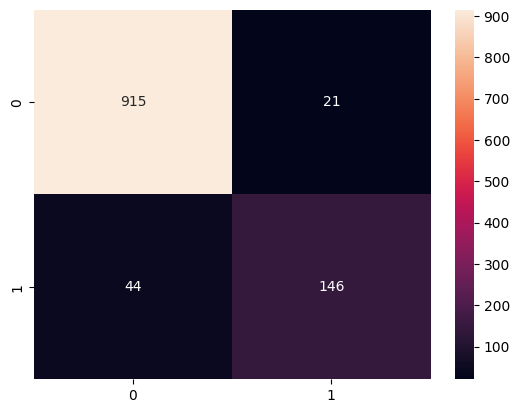

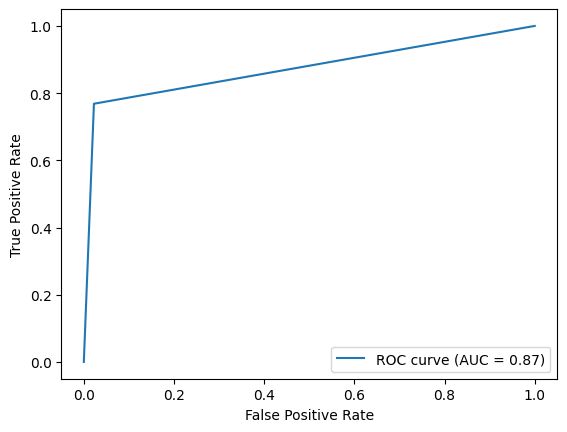

In [34]:
import lightgbm as lgb

# train va test datalarni umumlashtiramiz
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

# LightGBM parametrlarini sozlaymiz
params = {'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric': 'binary_logloss',
          'num_leaves': 31,
          'learning_rate': 0.05,
          'feature_fraction': 0.9,
          'bagging_fraction': 0.8,
          'bagging_freq': 5,
          'verbose': 0}

# train the LightGBM model
model = lgb.train(params, d_train, num_boost_round=100)

# make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

# evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()